<a href="https://colab.research.google.com/github/hhidayatinc/PCVK_Martikulasi_2022/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


No 1

Gamma Correction pada citra
--------------------------------
Masukkan nilai gamma: 3


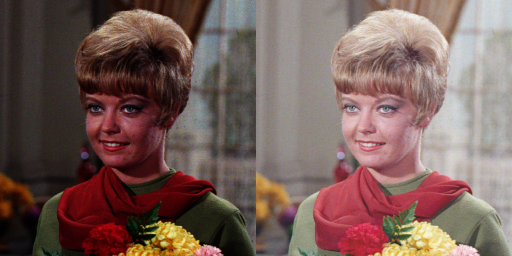

In [4]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

print('Gamma Correction pada citra')
print('--------------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)
invGamma = 1/gamma

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(((original[y,x,c]/255) ** invGamma) * 255, 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

No 2

Bit Depth pada citra
--------------------------------
Masukkan nilai bit: 3


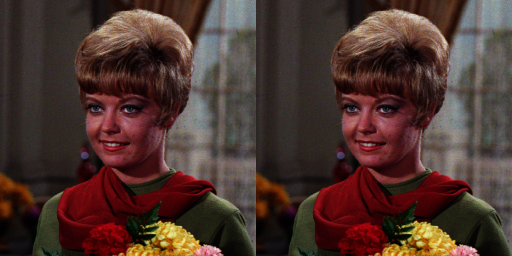

In [5]:
print('Bit Depth pada citra')
print('--------------------------------')
try:
  bit_depth = int(input('Masukkan nilai bit: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
bit_image = np.zeros(original.shape, original.dtype)
bd = 2**bit_depth
level = 255/(bd-1)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      bit_image[y,x,c] = np.clip(round((original[y,x,c]/level)*level), 0, 255)

final_frame = cv.hconcat((original, bit_image))
cv2_imshow(final_frame)

No 3

In [8]:
import glob #library untuk membaca semua image di dalam folder
from math import log10, sqrt #untuk perhitungan matematika

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg') #gambar asli yang akan dibandingkan
cv_img = [] #dari sini sampe cv_img.append aku liat di modul
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

Nilai PSNR Citra di Average 5: 
28.436111559665626


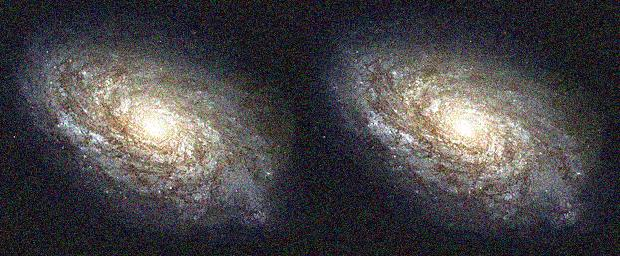

In [13]:
def PSNR(img1, img2):#funci pnsr in liat di modul
  mse = np.mean((img1 - img2) ** 2)
  if(mse==0):
    return 100
  
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel/sqrt(mse))
  return psnr

#average 5
ori_img = cv_img[0]
noise_img = cv_img[5]

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 5 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, noise_img))
cv2_imshow(final_frame)

Nilai PSNR Average 30adalah 28.44189640688837 (dB)


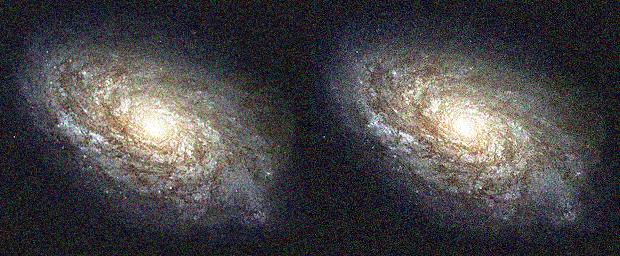

In [15]:
#average 30
ori_img = cv_img[0]
noise_img = cv_img[30]

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 30 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, noise_img))
cv2_imshow(final_frame)

Nilai PSNR Average 60 adalah 28.437893387847723 (dB)


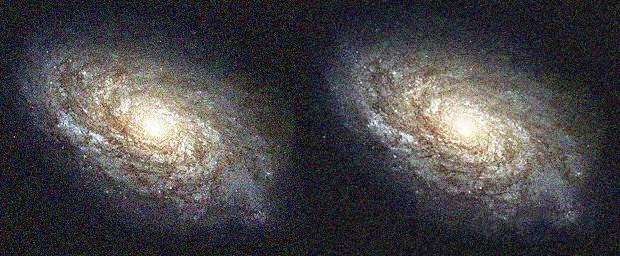

In [16]:
#average 60
ori_img = cv_img[0]
noise_img = cv_img[60]

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 60 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, noise_img))
cv2_imshow(final_frame)

Nilai PSNR Average 80 adalah 28.438688722785198 (dB)


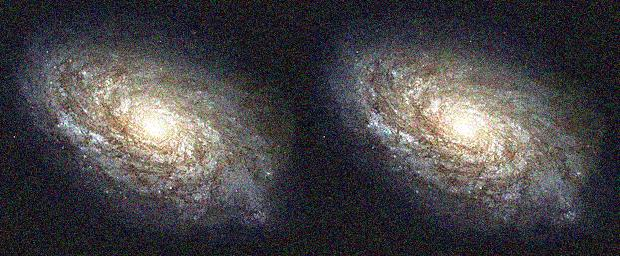

In [18]:
#average 80
ori_img = cv_img[0]
noise_img = cv_img[80]

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 80 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, noise_img))
cv2_imshow(final_frame)

Nilai PSNR Average 100 adalah 28.429361418618853 (dB)


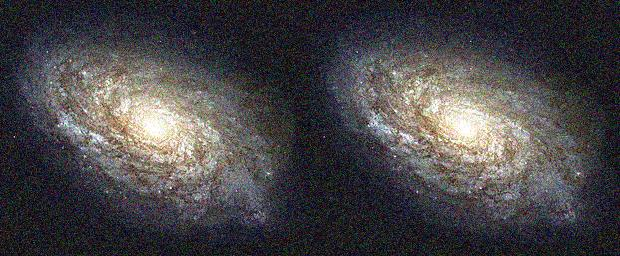

In [20]:
#average 100
ori_img = cv_img[0]
noise_img = cv_img[99]

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 100 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, noise_img))
cv2_imshow(final_frame)

Tugas 4